In [21]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.datasets import cifar10
# Para la optimización (en otra clase (20))
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

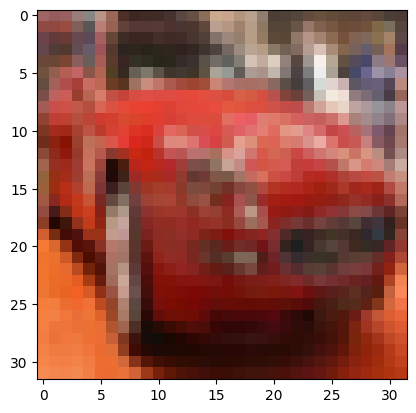

In [8]:
plt.imshow(x_train[5])

## Limpieza de Datos

In [10]:
# Limpieza de datos

#x_train = x_train.astype('float32')/255 # Así fue en la primera clase
#x_test = x_test.astype('float32')/255

# Clase 20 con OPTIMIZACION
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [11]:
num_clases = len(np.unique(y_train)) # -> 10

y_train = to_categorical(y_train, num_clases)
y_test = to_categorical(y_test, num_clases)


In [12]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

## Normalizar (Clase 20)

In [13]:
mean = np.mean(x_train) # Limpieza extra Clase 20
std  = np.std(x_train)

In [14]:
x_train = (x_train - mean) / (std + 1e-7)
x_test = (x_test - mean) / (std + 1e-7)

In [15]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print('x_train shape :', x_train.shape)

print('x_train:', x_train.shape[0])
print('val:', x_valid.shape[0])
print('test:', x_test.shape[0])

x_train shape : (45000, 32, 32, 3)
x_train: 45000
val: 5000
test: 10000


## CNN para Clasificación


In [16]:
base_filtros = 32
w_regulatizer = 1e-4

In [19]:
model = Sequential()
# Convolución 1
model.add(Conv2D(base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer), input_shape=x_train.shape[1:] ))
model.add(Activation('relu'))
model.add(BatchNormalization()) # Clase 20 - para Optimización
# Convolución 2
model.add(Conv2D(base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Convolución 3
model.add(Conv2D(2*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# Convolución 4
model.add(Conv2D(2*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
# Convolución 5
model.add(Conv2D(4*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
# Convolución 6
model.add(Conv2D(4*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# Clasificación - Flatten

model.add(Flatten())
model.add(Dense(num_clases, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 309,290 (1.18 MB)

 Trainable params: 308,394 (1.18 MB)

 Non-trainable params: 896 (3.50 KB)

In [20]:
# Clase 20 - Optimización
datagen = ImageDataGenerator(rotation_range = 15,
                             width_shift_range = 0.1,
                             height_shift_range = 0.1,
                             horizontal_flip = True,
                             vertical_flip = True
                            )

In [22]:

from tensorflow.keras import optimizers

In [24]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(), metrics=['accuracy'])

In [ ]:
# fit normal, ahora no sirve Clase 20 y 21
#hist = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_valid, y_valid), verbose=2, shuffle=True)

In [28]:
checkpoint = ModelCheckpoint('mi_mejor_modelo.keras', verbose=1, save_best_only=True)

In [31]:
# Clase 21 - Optimización
hist = model.fit(datagen.flow(x_train, y_train,batch_size=128),
          callbacks=[checkpoint],
          steps_per_epoch = x_train.shape[0] // 128,
          epochs = 120,
          verbose = 2,
          validation_data = (x_valid, y_valid)
         )

Epoch 1/120


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1748556503.203602      77 service.cc:148] XLA service 0x7da0c0049120 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748556503.204232      77 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1748556503.204257      77 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1748556503.862744      77 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1748556511.357354      77 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of th


Epoch 1: val_loss improved from inf to 2.24567, saving model to mi_mejor_modelo.keras
351/351 - 45s - 129ms/step - accuracy: 0.3266 - loss: 2.2064 - val_accuracy: 0.2722 - val_loss: 2.2457
Epoch 2/120


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss did not improve from 2.24567
351/351 - 0s - 1ms/step - accuracy: 0.3125 - loss: 2.0206 - val_accuracy: 0.2594 - val_loss: 2.3164
Epoch 3/120

Epoch 3: val_loss improved from 2.24567 to 1.89545, saving model to mi_mejor_modelo.keras
351/351 - 21s - 60ms/step - accuracy: 0.4316 - loss: 1.7191 - val_accuracy: 0.4134 - val_loss: 1.8954
Epoch 4/120

Epoch 4: val_loss did not improve from 1.89545
351/351 - 1s - 1ms/step - accuracy: 0.4766 - loss: 1.4661 - val_accuracy: 0.4014 - val_loss: 1.9625
Epoch 5/120

Epoch 5: val_loss improved from 1.89545 to 1.58518, saving model to mi_mejor_modelo.keras
351/351 - 21s - 61ms/step - accuracy: 0.5021 - loss: 1.5152 - val_accuracy: 0.5004 - val_loss: 1.5852
Epoch 6/120

Epoch 6: val_loss did not improve from 1.58518
351/351 - 0s - 1ms/step - accuracy: 0.5078 - loss: 1.4271 - val_accuracy: 0.5004 - val_loss: 1.6120
Epoch 7/120

Epoch 7: val_loss improved from 1.58518 to 1.36685, saving model to mi_mejor_modelo.keras
351/351 - 21s - 61m

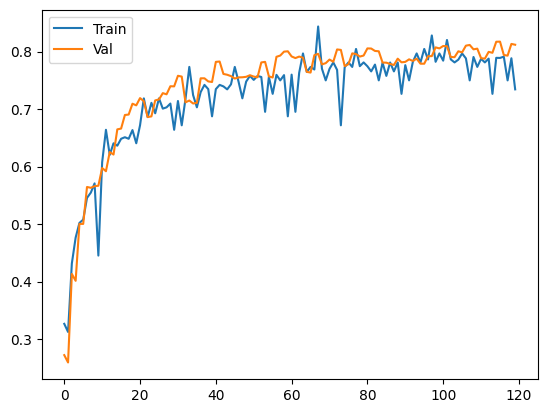

In [32]:
plt.plot(hist.history['accuracy'], label='Train')
plt.plot(hist.history['val_accuracy'], label='Val')
plt.legend()
plt.show()

In [33]:
# Clase 21 - Optimización
model2 = model

In [34]:
model2.load_weights('mi_mejor_modelo.keras')

In [35]:
loss, accuracy = model2.evaluate(x_test, y_test)
print(f'loss \t\t: {loss:.4f}')
print(f'Accurcy \t: {accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7927 - loss: 0.7270
loss 		: 0.7236
Accurcy 	: 0.7975
